<a href="https://colab.research.google.com/github/Bhavya-Mistry/Data-Science/blob/main/SyntheticDataGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# # Let's use our same model code
# from isklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB


# # Convert text descriptions into numbers
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(expenses)

# # Create and train the model
# model = MultinomialNB()
# model.fit(X, categories)

# # Test with our tricky examples
# X_test = vectorizer.transform(test_expenses)
# predictions = model.predict(X_test)

# # Print predictions
# print("\nPredictions for tricky cases:")
# for expense, prediction in zip(test_expenses, predictions):
#     print(f"Expense: '{expense}' → Predicted Category: '{prediction}'")


Predictions for tricky cases:
Expense: 'Bicycle' → Predicted Category: 'entertainment'


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Let's start with a very simple example dataset
expenses = [
    "walmart groceries",
    "walmart food shopping",
    "target grocery run",
    "netflix monthly",
    "netflix subscription",
    "spotify premium",
    "uber ride",
    "uber trip to airport",
    "lyft ride home",
    "starbucks coffee",
    "starbucks latte",
    "restaurant dinner"
]

# These are the categories we're predicting
categories = [
    "groceries",    # walmart groceries
    "groceries",    # walmart food shopping
    "groceries",    # target grocery run
    "entertainment", # netflix monthly
    "entertainment", # netflix subscription
    "entertainment", # spotify premium
    "transport",    # uber ride
    "transport",    # uber trip to airport
    "transport",    # lyft ride home
    "dining",       # starbucks coffee
    "dining",       # starbucks latte
    "dining"        # restaurant dinner
]

# Step 1: Convert text descriptions into numbers
# This creates a simple word count for each expense description
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(expenses)

# Step 2: Create and train the model
model = MultinomialNB()
model.fit(X, categories)

# Step 3: Let's test it with new expenses!
new_expenses = [
    "walmart shopping",
    "netflix payment",
    "uber to work",
    "starbucks morning coffee"
]

# Convert new expenses to the same number format
X_new = vectorizer.transform(new_expenses)

# Make predictions
predictions = model.predict(X_new)

# Print predictions in a readable way
print("\nLet's see what the model predicts:")
for expense, prediction in zip(new_expenses, predictions):
    print(f"Expense: '{expense}' → Category: '{prediction}'")


Let's see what the model predicts:
Expense: 'walmart shopping' → Category: 'groceries'
Expense: 'netflix payment' → Category: 'entertainment'
Expense: 'uber to work' → Category: 'transport'
Expense: 'starbucks morning coffee' → Category: 'dining'


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random  # We'll use Python's built-in random for some operations

class FinancialDataGenerator:
    def __init__(self):
        # Define common merchants for each category
        self.category_merchants = {
            'groceries': [
                ('Walmart', 20, 200),
                ('Target', 20, 150),
                ('Whole Foods', 30, 250),
                ('Trader Joes', 25, 180),
                ('Local Grocery', 15, 100)
            ],
            'entertainment': [
                ('Netflix', 9.99, 17.99),
                ('Spotify', 9.99, 14.99),
                ('Movie Theater', 15, 50),
                ('Steam Games', 10, 60),
                ('Amazon Prime', 12.99, 14.99)
            ],
            'dining': [
                ('Starbucks', 5, 25),
                ('McDonalds', 8, 30),
                ('Local Restaurant', 20, 100),
                ('Pizza Delivery', 15, 50),
                ('Food Truck', 10, 25)
            ],
            'transport': [
                ('Uber', 10, 50),
                ('Lyft', 10, 45),
                ('Gas Station', 30, 70),
                ('Train Pass', 25, 100),
                ('Bus Ticket', 2, 10)
            ],
            'utilities': [
                ('Electric Company', 50, 200),
                ('Water Service', 40, 100),
                ('Internet Provider', 50, 100),
                ('Phone Bill', 40, 120),
                ('Gas Bill', 30, 150)
            ]
        }

        # Transaction description templates
        self.descriptions = {
            'groceries': ['groceries', 'food', 'grocery shopping', 'supermarket'],
            'entertainment': ['subscription', 'monthly', 'entertainment'],
            'dining': ['coffee', 'meal', 'lunch', 'dinner'],
            'transport': ['ride', 'trip', 'transport'],
            'utilities': ['bill', 'monthly service', 'utility']
        }

    def generate_transaction(self, date, category=None):
        """Generate a single realistic transaction"""
        # If no category specified, randomly choose one
        if category is None:
            category = random.choice(list(self.category_merchants.keys()))

        # Randomly select a merchant entry using random.choice instead of np.random.choice
        merchant_data = random.choice(self.category_merchants[category])
        merchant, min_price, max_price = merchant_data

        # Generate a realistic amount
        amount = round(random.uniform(min_price, max_price), 2)

        # Create transaction description
        description = f"{merchant} {random.choice(self.descriptions[category])}"

        return {
            'date': date,
            'description': description,
            'amount': amount,
            'category': category,
            'merchant': merchant
        }

    def generate_dataset(self, num_months=6, transactions_per_month=100):
        """Generate a dataset of transactions over several months"""
        transactions = []

        # Calculate date range
        end_date = datetime.now()
        start_date = end_date - timedelta(days=30*num_months)

        # Generate regular monthly subscriptions
        current_date = start_date
        while current_date < end_date:
            # Add regular monthly expenses (subscriptions and utilities)
            for category in ['entertainment', 'utilities']:
                for _ in range(random.randint(1, 3)):  # 1-2 transactions per category
                    transactions.append(
                        self.generate_transaction(current_date, category)
                    )
            current_date += timedelta(days=30)

        # Generate random transactions across the time period
        for _ in range(transactions_per_month):
            random_days = random.randint(0, num_months * 30)
            transaction_date = start_date + timedelta(days=random_days)
            transactions.append(self.generate_transaction(transaction_date))

        # Convert to DataFrame and sort by date
        df = pd.DataFrame(transactions)
        return df.sort_values('date')

# Let's test the generator
if __name__ == "__main__":
    try:
        # Create generator instance
        generator = FinancialDataGenerator()

        # Generate dataset
        print("Generating dataset...")
        df = generator.generate_dataset(num_months=6, transactions_per_month=100)

        # Display example transactions
        print("\nExample Transactions:")
        print(df[['date', 'description', 'amount', 'category']].head())

        # Show dataset statistics
        print("\nDataset Statistics:")
        print(f"Total Transactions: {len(df)}")
        print("\nTransactions by Category:")
        print(df['category'].value_counts())
        print("\nAverage Amount by Category:")
        print(df.groupby('category')['amount'].mean().round(2))

    except Exception as e:
        print(f"An error occurred: {str(e)}")

Generating dataset...

Example Transactions:
                         date                 description  amount  \
0  2024-07-20 14:08:53.646594  Movie Theater subscription   22.60   
1  2024-07-20 14:08:53.646594       Water Service utility   55.70   
2  2024-07-20 14:08:53.646594      Internet Provider bill   71.21   
3  2024-07-20 14:08:53.646594      Internet Provider bill   54.66   
43 2024-07-21 14:08:53.646594        Amazon Prime monthly   14.58   

         category  
0   entertainment  
1       utilities  
2       utilities  
3       utilities  
43  entertainment  

Dataset Statistics:
Total Transactions: 122

Transactions by Category:
category
entertainment    32
utilities        31
dining           23
transport        20
groceries        16
Name: count, dtype: int64

Average Amount by Category:
category
dining           32.26
entertainment    23.27
groceries        85.56
transport        44.00
utilities        86.58
Name: amount, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

def generate_synthetic_data(data_size=5):
    np.random.seed(42)
    categories = ['Food','Groceries', 'Health','Investments','Debt/Loan','Personal Care','Housing', 'Transport', 'Shopping','Education', 'Entertainment','Bills','Other']

    # Generate random data
    money_spent = np.random.randint(100, 5000, size=data_size)
    category = np.random.choice(categories, size=data_size)
    future_expense = money_spent * np.random.uniform(1.1, 1.5, size=data_size)

    # Create DataFrame
    data = pd.DataFrame({
        'money_spent': money_spent,
        'category': category,
        'future_expense': future_expense
    })
    return data

if __name__ == "__main__":
    data = generate_synthetic_data()
    data.to_csv("synthetic_expense_data.csv", index=False)
    print("Synthetic data saved as 'synthetic_expense_data.csv'")


df = pd.read_csv("synthetic_expense_data.csv")


Synthetic data saved as 'synthetic_expense_data.csv'


In [ ]:
df.head()

,money_spent,category,future_expense
0,960,Entertainment,1327.899870
1,3872,Transport,4291.081265
2,3192,Debt/Loan,4749.580899
3,566,Investments,811.065014
4,4526,Transport,5363.018726


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Step 1: Load the Synthetic Data
data = pd.read_csv("synthetic_expense_data.csv")

# Step 2: Aggregate Data by Category
aggregated_data = data.groupby('category').sum().reset_index()

# Preprocess for training
encoder = OneHotEncoder()
categories_encoded = encoder.fit_transform(aggregated_data[['category']]).toarray()
categories_df = pd.DataFrame(categories_encoded, columns=encoder.get_feature_names_out(['category']))

# Combine encoded categories with aggregated money spent
features = pd.concat([aggregated_data[['money_spent']], categories_df], axis=1)
target = aggregated_data['future_expense']

# Step 3: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Step 4: Evaluate the Model
predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target, predictions)

# Custom Accuracy: Percentage of predictions within ±10% of actual values
tolerance = 0.1  # 10%
accurate_predictions = np.sum(abs(predictions - target) <= tolerance * target)
custom_accuracy = (accurate_predictions / len(target)) * 100

# Print Metrics
print(f"Model Performance Metrics:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.2f}")
print(f"  Custom Accuracy (±10% tolerance): {custom_accuracy:.2f}%")

# Step 5: Save the Trained Model
joblib.dump(model, 'aggregated_expense_model.pkl')
print("Model saved as 'aggregated_expense_model.pkl'")


Model Performance Metrics:
  Mean Squared Error (MSE): 14905726.12
  Root Mean Squared Error (RMSE): 3860.79
  R² Score: 0.96
  Custom Accuracy (±10% tolerance): 92.31%
Model saved as 'aggregated_expense_model.pkl'


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Step 1: Load the Synthetic Data
data = pd.read_csv("synthetic_expense_data.csv")

# Step 2: Aggregate Data by Category
aggregated_data = data.groupby('category').sum().reset_index()

# Preprocess for training
encoder = OneHotEncoder()
categories_encoded = encoder.fit_transform(aggregated_data[['category']]).toarray()
categories_df = pd.DataFrame(categories_encoded, columns=encoder.get_feature_names_out(['category']))

# Combine encoded categories with aggregated money spent
features = pd.concat([aggregated_data[['money_spent']], categories_df], axis=1)
target = aggregated_data['future_expense']

# Step 3: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Predict Future Expense for All Logged Entries (Aggregate Prediction)
# Summarize the total money spent across all categories
total_money_spent = data['money_spent'].sum()

# Create a single-row input for prediction
total_categories = encoder.transform(data[['category']]).toarray().sum(axis=0)  # Sum the one-hot encoded categories
single_input = np.concatenate([[total_money_spent], total_categories])  # Combine money spent with categories
single_input = single_input.reshape(1, -1)  # Reshape for prediction

# Predict future expense for aggregated data
predicted_future_expense = model.predict(single_input)[0]

# Print Predictions
print(f"\nUser Logged Entries Summary:")
print(f"  Total Money Spent: {total_money_spent}")
print(f"\nPredicted Future Expense: {predicted_future_expense:.2f}")

# Save the Trained Model
joblib.dump(model, 'aggregated_expense_model.pkl')
print("\nModel saved as 'aggregated_expense_model.pkl'")



User Logged Entries Summary:
  Total Money Spent: 13116

Predicted Future Expense: 7495.16

Model saved as 'aggregated_expense_model.pkl'


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# NEWWWWWW

In [ ]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker instance
fake = Faker()

# Set up random seed for reproducibility
Faker.seed(0)
random.seed(0)

# Categories for spending
categories = ['Food','Groceries', 'Health','Investments','Debt/Loan','Personal Care','Housing', 'Transport', 'Shopping','Education', 'Entertainment','Bills', 'Other']

# Generate random data
def generate_data(num_users, num_entries_per_user):
    data = []

    for user_id in range(1, num_users + 1):
        current_date = datetime(2023, 1, 1)  # Starting date for user transactions

        for entry_id in range(num_entries_per_user):
            # Random amount between 100 and 5000 (you can change this range)
            amount = round(random.uniform(100, 5000), 2)

            # Random category selection
            category = random.choice(categories)

            # Add random transaction data to the list
            data.append({
                'user_id': user_id,
                'amount': amount,
                'date': current_date,
                'category': category
            })

            # Increment the date by a random number of days (between 1 and 30 days)
            current_date += timedelta(days=random.randint(1, 30))

    # Convert list to DataFrame
    df = pd.DataFrame(data)
    return df

# Generate synthetic data for 100 users, each with 30 entries
num_users = 100
num_entries_per_user = 30

data_df = generate_data(num_users, num_entries_per_user)

# Preview the generated data


# Save the data to a CSV file
data_df.to_csv("synthetic_spending_data.csv", index=False)


In [ ]:
data_df.shape

(3000, 4)

In [ ]:
data_df.head()

,user_id,amount,date,category
0,1,4237.67,2023-01-01,Other
1,1,2160.80,2023-01-30,Debt/Loan
2,1,2481.05,2023-02-16,Other
3,1,1586.23,2023-03-15,Transport
4,1,2958.57,2023-03-27,Investments


Mean Squared Error: 1560670.8951000327


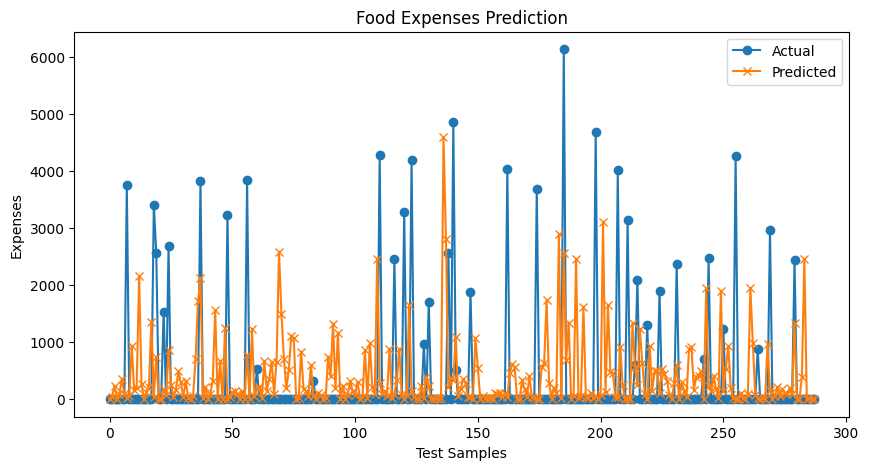

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_df = pd.read_csv("synthetic_spending_data.csv")

# Preprocessing
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['month'] = data_df['date'].dt.to_period('M')

# Group by user_id, month, and category
monthly_expenses = data_df.groupby(['user_id', 'month', 'category']).agg(
    total_amount=('amount', 'sum')
).reset_index()

# Pivot to create category-wise columns
pivoted_data = monthly_expenses.pivot_table(
    index=['user_id', 'month'],
    columns='category',
    values='total_amount',
    fill_value=0
).reset_index()

# Create lag features
pivoted_data = pivoted_data.sort_values(['user_id', 'month'])
categories = pivoted_data.columns[2:]  # Categories start from the 3rd column
lag_features = []

for col in categories:
    pivoted_data[f'{col}_lag1'] = pivoted_data.groupby('user_id')[col].shift(1)
    lag_features.append(f'{col}_lag1')

# Drop rows with NaN values (first month for each user)
pivoted_data = pivoted_data.dropna()

# Define features (X) and target (y)
X = pivoted_data[lag_features]
y = pivoted_data[categories]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs actual for one category (e.g., 'Food')
category_to_plot = 'Food'
if category_to_plot in categories:
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[category_to_plot].values, label='Actual', marker='o')
    plt.plot(y_pred[:, list(categories).index(category_to_plot)], label='Predicted', marker='x')
    plt.title(f'{category_to_plot} Expenses Prediction')
    plt.xlabel('Test Samples')
    plt.ylabel('Expenses')
    plt.legend()
    plt.show()
else:
    print(f"Category '{category_to_plot}' not found in data.")


Mean Squared Error: 1307272.4496263836
R² Score (Accuracy): -3.09%


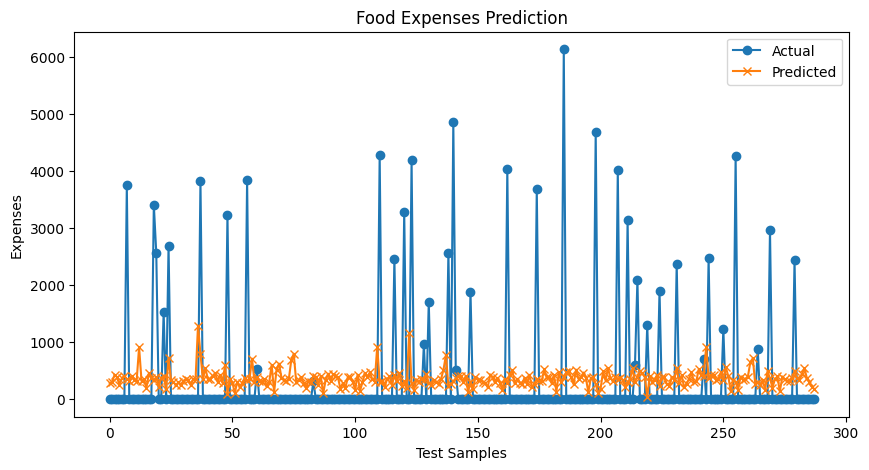

Predicted next month's expenses for User 101:
{'Bills': 173.46, 'Debt/Loan': 659.77, 'Education': 728.37, 'Entertainment': 417.94, 'Food': 172.55, 'Groceries': 766.07, 'Health': 169.71, 'Housing': 1280.26, 'Investments': 437.48, 'Other': 860.54, 'Personal Care': 363.62, 'Shopping': 385.22, 'Transport': 954.0}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load data
data_df = pd.read_csv("synthetic_spending_data.csv")

# Preprocessing
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['month'] = data_df['date'].dt.to_period('M')

# Group by user_id, month, and category
monthly_expenses = data_df.groupby(['user_id', 'month', 'category']).agg(
    total_amount=('amount', 'sum')
).reset_index()

# Pivot to create category-wise columns
pivoted_data = monthly_expenses.pivot_table(
    index=['user_id', 'month'],
    columns='category',
    values='total_amount',
    fill_value=0
).reset_index()

# Create lag features
pivoted_data = pivoted_data.sort_values(['user_id', 'month'])
categories = pivoted_data.columns[2:]  # Categories start from the 3rd column
lag_features = []

for col in categories:
    pivoted_data[f'{col}_lag1'] = pivoted_data.groupby('user_id')[col].shift(1)
    lag_features.append(f'{col}_lag1')

# Drop rows with NaN values (first month for each user)
pivoted_data = pivoted_data.dropna()

# Define features (X) and target (y)
X = pivoted_data[lag_features]
y = pivoted_data[categories]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Update train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(
    n_estimators=200,  # Increase the number of trees
    max_depth=15,      # Limit tree depth
    min_samples_split=5,  # Minimum samples required to split a node
    random_state=42
)
model.fit(X_train, y_train)


# # Initialize and train model
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "monthly_expenses_model.pkl")

# Load the model for testing
loaded_model = joblib.load("monthly_expenses_model.pkl")

# Predict on test set
y_pred = loaded_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")

# Visualize predicted vs actual for one category (e.g., 'Food')
category_to_plot = 'Food'
if category_to_plot in categories:
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[category_to_plot].values, label='Actual', marker='o')
    plt.plot(y_pred[:, list(categories).index(category_to_plot)], label='Predicted', marker='x')
    plt.title(f'{category_to_plot} Expenses Prediction')
    plt.xlabel('Test Samples')
    plt.ylabel('Expenses')
    plt.legend()
    plt.show()
else:
    print(f"Category '{category_to_plot}' not found in data.")

# Function to predict for new user data
def predict_monthly_expenses(user_id, current_month_data):
    """
    Predict next month's expenses for a user based on current month's data.

    :param user_id: ID of the user
    :param current_month_data: Dictionary with category-wise current month expenses
    :return: Predicted expenses for next month
    """
    # Convert current data into DataFrame with lag feature structure
    input_data = {f"{col}_lag1": [current_month_data.get(col, 0)] for col in categories}
    input_df = pd.DataFrame(input_data)

    # Predict using the saved model
    predicted_expenses = loaded_model.predict(input_df)

    # Convert predictions to a readable dictionary
    prediction_dict = {categories[i]: round(predicted_expenses[0][i], 2) for i in range(len(categories))}
    return prediction_dict

# Example: Predict for a new user
new_user_id = 101  # User ID
current_month_expenses = {
    'Food': 2000,
    'Groceries': 1500,
    'Health': 800,
    'Transport': 1000
}  # Current month's expenses for some categories

predicted_next_month = predict_monthly_expenses(new_user_id, current_month_expenses)
print(f"Predicted next month's expenses for User {new_user_id}:")
print(predicted_next_month)


category      user_id        Bills     Debt/Loan    Education  Entertainment  \
count     1438.000000  1438.000000   1438.000000  1438.000000    1438.000000   
mean        50.581363   370.189006    420.637121   354.692670     362.302566   
std         28.815565  1084.244437   1173.364867  1095.093693    1092.352496   
min          1.000000     0.000000      0.000000     0.000000       0.000000   
25%         26.000000     0.000000      0.000000     0.000000       0.000000   
50%         50.000000     0.000000      0.000000     0.000000       0.000000   
75%         76.000000     0.000000      0.000000     0.000000       0.000000   
max        100.000000  8984.910000  12187.430000  8153.360000    9333.670000   

category         Food    Groceries       Health      Housing  Investments  \
count     1438.000000  1438.000000  1438.000000  1438.000000  1438.000000   
mean       354.603866   367.140167   381.461947   391.677531   376.899416   
std       1091.947566  1098.310441  1102.992063 

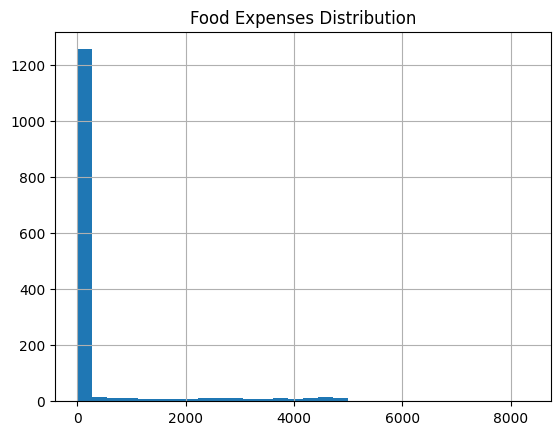

In [ ]:
# Check data statistics for anomalies
print(pivoted_data.describe())

# Visualize data for one category (e.g., 'Food')
pivoted_data['Food'].hist(bins=30)
plt.title('Food Expenses Distribution')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")


Cross-Validation R² Scores: [-0.02923548 -0.03359457 -0.02346132 -0.02070003 -0.03250696]
Mean Cross-Validation R² Score: -0.027899671742451837


category        Bills     Debt/Loan    Education  Entertainment         Food  \
count     1438.000000   1438.000000  1438.000000    1438.000000  1438.000000   
mean       370.189006    420.637121   354.692670     362.302566   354.603866   
std       1084.244437   1173.364867  1095.093693    1092.352496  1091.947566   
min          0.000000      0.000000     0.000000       0.000000     0.000000   
25%          0.000000      0.000000     0.000000       0.000000     0.000000   
50%          0.000000      0.000000     0.000000       0.000000     0.000000   
75%          0.000000      0.000000     0.000000       0.000000     0.000000   
max       8984.910000  12187.430000  8153.360000    9333.670000  8326.630000   

category    Groceries       Health      Housing  Investments        Other  \
count     1438.000000  1438.000000  1438.000000  1438.000000  1438.000000   
mean       367.140167   381.461947   391.677531   376.899416   322.751523   
std       1098.310441  1102.992063  1127.089460 

In [ ]:
data_df.head()

,user_id,amount,date,category,month
0,1,4237.67,2023-01-01,Other,2023-01
1,1,2160.80,2023-01-30,Debt/Loan,2023-01
2,1,2481.05,2023-02-16,Other,2023-02
3,1,1586.23,2023-03-15,Transport,2023-03
4,1,2958.57,2023-03-27,Investments,2023-03


In [ ]:
# Aggregate monthly total amount by user_id, category, and month
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['month'] = data_df['date'].dt.to_period('M')

monthly_expenses = data_df.groupby(['user_id', 'month', 'category']).agg(
    total_amount=('amount', 'sum')
).reset_index()


In [ ]:
# Pivot table to create category-wise columns
pivoted_data = monthly_expenses.pivot_table(
    index=['user_id', 'month'],
    columns='category',
    values='total_amount',
    fill_value=0
).reset_index()


In [ ]:
# Sort data for proper lagging
pivoted_data = pivoted_data.sort_values(['user_id', 'month'])

# Create lag features
categories = pivoted_data.columns[2:]  # All categories start from the 3rd column
lag_features = []

for col in categories:
    pivoted_data[f'{col}_lag1'] = pivoted_data.groupby('user_id')[col].shift(1)
    lag_features.append(f'{col}_lag1')

# Drop rows with NaN values (first month for each user due to lagging)
pivoted_data = pivoted_data.dropna()

# Define features (X) and target (y)
X = pivoted_data[lag_features]
y = pivoted_data[categories]  # Current month's expenses (target)


In [ ]:
# Sort data for proper lagging
pivoted_data = pivoted_data.sort_values(['user_id', 'month'])

# Create lag features
categories = pivoted_data.columns[2:]  # All categories start from the 3rd column
lag_features = []

for col in categories:
    pivoted_data[f'{col}_lag1'] = pivoted_data.groupby('user_id')[col].shift(1)
    lag_features.append(f'{col}_lag1')

# Drop rows with NaN values (first month for each user due to lagging)
pivoted_data = pivoted_data.dropna()

# Define features (X) and target (y)
X = pivoted_data[lag_features]
y = pivoted_data[categories]  # Current month's expenses (target)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2 * 100:.2f}%")


Mean Squared Error: 1307272.4496263836
R² Score: -3.09%


In [ ]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for synthetic dataset
num_users = 50  # Number of users
categories = ['Food', 'Transport', 'Health', 'Groceries', 'Other', 'Debt/Loan', 'Investments']
num_months = 12  # Number of months for each user
start_date = '2023-01-01'  # Start date of data

# Generate synthetic data
data = []
for user_id in range(1, num_users + 1):
    for month_offset in range(num_months):
        date = pd.Timestamp(start_date) + pd.offsets.MonthBegin(month_offset)
        for category in categories:
            amount = round(random.uniform(100, 5000), 2)  # Random expenses between 100 and 5000
            data.append([user_id, amount, date, category])

# Create DataFrame
data_df = pd.DataFrame(data, columns=['user_id', 'amount', 'date', 'category'])

# Add "month" column
data_df['month'] = data_df['date'].dt.to_period('M')

# Aggregate monthly total amount by user_id, category, and month
monthly_expenses = data_df.groupby(['user_id', 'month', 'category']).agg(
    total_amount=('amount', 'sum')
).reset_index()

# Pivot table to create category-wise columns
pivoted_data = monthly_expenses.pivot_table(
    index=['user_id', 'month'],
    columns='category',
    values='total_amount',
    fill_value=0
).reset_index()

# Sort by user_id and month
pivoted_data = pivoted_data.sort_values(['user_id', 'month'])

# Add "output" columns for next month's expenses (shifted data)
for category in categories:
    pivoted_data[f'{category}_next_month'] = pivoted_data.groupby('user_id')[category].shift(-1)

# Drop rows with NaN values (last month for each user has no "next month" data)
labeled_data = pivoted_data.dropna().reset_index(drop=True)

# Save labeled dataset to CSV
labeled_data.to_csv("labeled_spending_data.csv", index=False)

print("Labeled dataset with output columns created and saved as 'labeled_spending_data.csv'.")


Labeled dataset with output columns created and saved as 'labeled_spending_data.csv'.


In [ ]:
test = pd.read_csv("labeled_spending_data.csv")

In [ ]:
test.head()

,user_id,month,Debt/Loan,Food,Groceries,Health,Investments,Other,Transport,Food_next_month,Transport_next_month,Health_next_month,Groceries_next_month,Other_next_month,Debt/Loan_next_month,Investments_next_month
0,1,2023-01,128.29,1862.52,3354.21,1291.51,4145.33,1395.98,600.44,2741.21,4424.70,1415.92,1667.05,251.13,2587.27,4484.35
1,1,2023-02,2587.27,2741.21,1667.05,1415.92,4484.35,251.13,4424.70,108.75,2929.86,1277.63,3465.62,4634.78,2473.35,4396.14
2,1,2023-03,2473.35,108.75,3465.62,1277.63,4396.14,4634.78,2929.86,1989.96,1166.69,2171.18,3327.15,4031.52,3417.24,452.03
3,1,2023-04,3417.24,1989.96,3327.15,2171.18,452.03,4031.52,1166.69,3997.89,749.35,663.79,1140.50,953.64,1046.50,1082.49
4,1,2023-05,1046.50,3997.89,1140.50,663.79,1082.49,953.64,749.35,2722.97,4315.49,2674.51,3321.23,3933.26,4951.52,1444.03
